In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.patheffects as pe
import matplotlib as mpl
import numpy as np
import scipy as sp


In [2]:
from matplotlib import rcParams


In [3]:
# sns.set_style('white')
sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1)

plt.rc('font', family='serif')

plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('legend', title_fontsize='small', fontsize='small')


plt.rcParams['svg.fonttype'] = 'none'

In [4]:
from palettable import wesanderson
color_palette = wesanderson.Zissou_5.mpl_colors

In [5]:
# # dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl')
# dataset = pd.read_pickle('../../../geodata/results/01_master_building_dataset.pkl')

dataset = pd.read_pickle('../../geodata/results/02_spatial_lagged_master.pkl')
# dataset = pd.read_pickle('../../../geodata/results/02_spatial_lagged_master.pkl')

In [6]:
# maxvsh_cols    = dataset.columns[dataset.columns.str.contains('maxvsh')].tolist()
# vaccess_cols   = dataset.columns[dataset.columns.str.contains('vwa')].tolist()
# # mean_cols      = dataset.columns[dataset.columns.str.contains('mn')].tolist()
# dist_cols      = dataset.columns[dataset.columns.str.contains('sum_')].tolist()
# vconfig_cols   = np.setdiff1d(dataset.columns[np.where(dataset.columns == 'snt_0')[0][0]:np.where(dataset.columns == 'cmpx_gini')[0][0]+1].tolist(),dist_cols).tolist()
# id_cols        = ['ID_Geb','Stockwerk','FassPktX','FassPktY','FassPktZ']

# dataset['unit_pano'] = dataset['unit_pano'].fillna(0)



In [7]:
# import joblib
# xgb_model   = joblib.load("../../../geodata/results/t10agglo_models/tr292ts73_XGB.joblib")
# model_feats    = maxvsh_cols+vaccess_cols+vconfig_cols+dist_cols

# import joblib
# scaler_4model   = joblib.load("../../../geodata/results/scaler_for_model.joblib")

# X = dataset.copy()
# X[model_feats] = scaler_4model.transform(dataset[model_feats])

# X['XGB'] = xgb_model.predict(X[xgb_model.feature_names_in_])


In [8]:
# dataset['z'] = dataset.groupby('GMDNAME')['XGB'].transform(lambda x: (x - x.median()) / x.std())
dataset['z'] = (dataset.XGB - dataset.XGB.mean() )/ dataset.XGB.std()
dataset['nabr_z'] = (dataset.nabr_avg_pred - dataset.nabr_avg_pred.mean() )/ dataset.nabr_avg_pred.std()

dataset['mm_pred'] =(dataset.XGB - dataset.XGB.min() )/(dataset.XGB.max() - dataset.XGB.min() )
dataset['mm_nabr_pred'] =(dataset.nabr_avg_pred - dataset.nabr_avg_pred.min() )/(dataset.nabr_avg_pred.max() - dataset.nabr_avg_pred.min() )

dataset['error'] = np.log(dataset['net_income_ptp']/dataset['XGB'])
dataset['nabr_error'] = np.log(dataset['nabr_avg_pred']/dataset['net_income_ptp'])

dataset['z_error'] = dataset.groupby('GMDNAME')['error'].transform(lambda x: np.log(x - x.median()))

c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\swie

In [11]:
X = dataset.copy()

In [12]:
sel_10agglo_lst = dataset.groupby(['Agglo_Name','Rich_Nabr'])['GMDNR'].size().unstack().sort_values(by = 'R', ascending = False).head(10).index.tolist()
dat = X.query("Agglo_Name in @sel_10agglo_lst")#.query('net_income_ptp < 250')
dat = dat.query("Agglo_Name in @sel_10agglo_lst")#.query('net_income_ptp < 250')


In [13]:
df = dat[['Agglo_Name','net_income_ptp','error']].melt(id_vars = ['Agglo_Name','net_income_ptp'])
df = dat[['Agglo_Name','error','XGB','net_income_ptp']].dropna().groupby('net_income_ptp').sample(10)

In [14]:
dfcomm = dat.reset_index().groupby(['Agglo_Name','GMDNAME'])['XGB'].describe()
dfcomm['net_income_ptp'] = dat.reset_index().groupby(['Agglo_Name','GMDNAME'])['net_income_ptp'].mean()
dfcomm['95%'] = dat.reset_index().groupby(['Agglo_Name','GMDNAME'])['XGB'].apply(lambda x: x.quantile(.95))



In [15]:
import mapclassify as mc

In [16]:
dfm = dat.reset_index().groupby('GMDNAME')['net_income_ptp','error','XGB'].mean()
dfm['err_min'] = dat.reset_index().groupby('GMDNAME')['error'].min()
dfm['err_max'] = dat.reset_index().groupby('GMDNAME')['error'].max()
dfm['err_var'] = dat.reset_index().groupby('GMDNAME')['error'].var()
dfm['err_med'] = dat.reset_index().groupby('GMDNAME')['error'].median()
dfm['err_skew'] = dat.reset_index().groupby('GMDNAME')['error'].skew()
dfm['err_std'] = dat.reset_index().groupby('GMDNAME')['error'].std()



C:\Users\swietek\AppData\Local\Temp\ipykernel_35792\709645637.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfm = dat.reset_index().groupby('GMDNAME')['net_income_ptp','error','XGB'].mean()


In [17]:
from palettable import wesanderson

c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


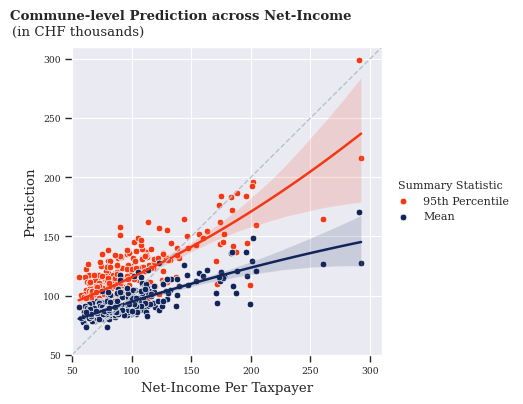

In [84]:
f, ax = plt.subplots(figsize=(4, 4))
xx = dataset.query('net_income_ptp > 0').query('net_income_ptp < 350')
bns = mc.NaturalBreaks(xx.net_income_ptp.dropna().unique(), k = 10).bins

sns.regplot(data = dfcomm.query('net_income_ptp < 350'), ax = ax, 
            x = 'net_income_ptp', y = '95%',
            # x_bins=bns,
            order = 2,
            color = color_palette[2],#wesanderson.Zissou_5.mpl_colors[2], 
            scatter_kws = {'edgecolor':'white','alpha':1,'linewidth':.5},
            # edgecolor="white",
            # alpha = .75,
            label = '95th Percentile')
g = sns.regplot(data = dfcomm.query('net_income_ptp < 350'), ax = ax, 
            x = 'net_income_ptp', y = 'mean',
            # x_bins=bns,
            order = 2,
            color = color_palette[1],#wesanderson.Zissou_5.mpl_colors[1],
            scatter_kws = {'edgecolor':'white','alpha':1,'linewidth':.5},
            # edgecolor="white", 
            # alpha = .75,
            label = 'Mean')

# sns.move_legend(ax, "upper left", frameon = False, title = 'Summary Statistic', fontsize = 'small')

ax.set_xlabel("Net-Income Per Taxpayer", fontsize = 'medium')
ax.set_ylabel('Prediction', fontsize = 'medium')

ax.set_title('Commune-level Prediction across Net-Income',loc = 'left', x = -.2,wrap = True, fontweight = 'bold', pad = 20)
ax.text(s = '(in CHF thousands)', x= 0,y =320)

ax.tick_params(axis = 'both', which = 'major', bottom=True, left = True)

ax.axline((50,50), slope = 1, color = color_palette[4], ls = 'dashed', lw = 1)
ax.set_ylim(50,310)
ax.set_xlim(50,310)
plt.legend( frameon = False, title = 'Summary Statistic', bbox_to_anchor=(1, .5), loc='center left')

plt.savefig('../../figs/fig2_ch_commune_aggregated.jpg',bbox_inches = 'tight', dpi = 300)


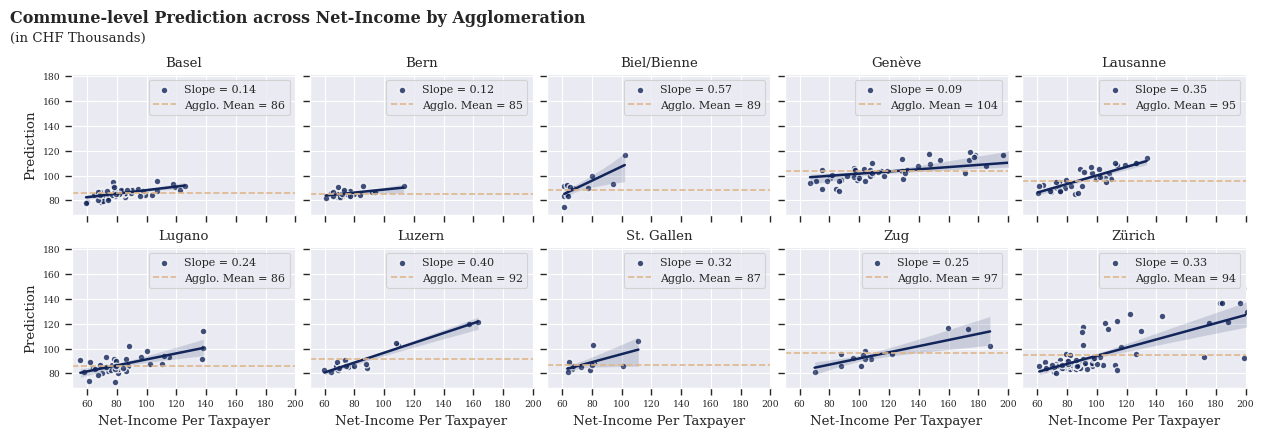

In [24]:
g = sns.lmplot(data = dfcomm.reset_index().dropna(), col='Agglo_Name', col_wrap=5, height = 2, aspect = 1.25,
            x = 'net_income_ptp', y = 'mean', 
            scatter_kws = {'edgecolor': 'white','facecolor':color_palette[1]},
            line_kws={'color':color_palette[1]})
for ax, feature in zip(g.axes.flat, g.col_names):
    df = dfcomm.reset_index().dropna().query('Agglo_Name == @feature')
    mn = dat.query('Agglo_Name == @feature')['XGB'].mean()
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x=df['net_income_ptp'], y = df['mean'])

    # r, pvalue = scipy.stats.pearsonr(df['net_income_ptp'], df['mean'])
    ax.axhline(mn, ls='--', c= color_palette[3], label = f'Agglo. Mean = {mn:.0f}')
    ax.collections[0].set_label(f'Slope = {slope:.2f}')
    
    # ax.text(s = f'Mean = {mn:.2f}', x = 100,y = 150, color = color_palette[3])

    ax.legend(loc = 0)
# annotate
g.set_titles("{col_name}")
g.set(xlim=(50, 200))
g.set_axis_labels(y_var = 'Prediction', x_var = 'Net-Income Per Taxpayer')
g.tick_params(axis = 'both', bottom = True, left = True)
g.fig.suptitle('Commune-level Prediction across Net-Income by Agglomeration', fontsize = 'large',x = 0, y = 1.08,fontweight = 'bold', ha = 'left')
g.fig.text(x=0, y=1.0, s="(in CHF Thousands)")
# _ = g.map_dataframe(annotate)

# plt.tight_layout()
# plt.savefig('../../../LUP_VisualCapital/figs/fig3_agglo_pred_v_income.pdf',bbox_inches = 'tight')
plt.savefig('../../figs/fig3_agglo_pred_v_income.jpg',bbox_inches = 'tight', dpi = 300)


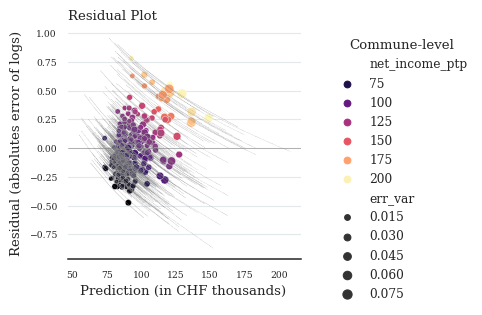

In [12]:
f, ax = plt.subplots(figsize=(3, 3))

sns.scatterplot(ax = ax, data = dfm , 
                x = 'XGB', y = 'err_med', size = 'err_var', hue = 'net_income_ptp', palette = 'magma', legend = True)
sns.lineplot(ax = ax, data = df, 
             x = 'XGB', y = 'error', style = 'net_income_ptp', color = 'grey', linewidth = 0.25, alpha = .75, legend = False)

sns.despine()
ax.set_xlabel("Prediction (in CHF thousands) ")
ax.set_ylabel('Residual (absolutes error of logs)')
ax.axhline(0, color = 'grey', linewidth = 0.5, alpha = .75)
ax.set_title('Residual Plot',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
ax.spines[['top','right','left']].set_visible(False)
ax.spines[['bottom','left']].set_linewidth(1.1)
ax.grid(which="major", axis='y', color='#758D99', alpha=0.2, zorder=1)
# ax.grid(which="major", axis='y', color='#758D99', alpha=0.2, zorder=5)

ax.legend(bbox_to_anchor=(1.1,1), title = "Commune-level", frameon = False)

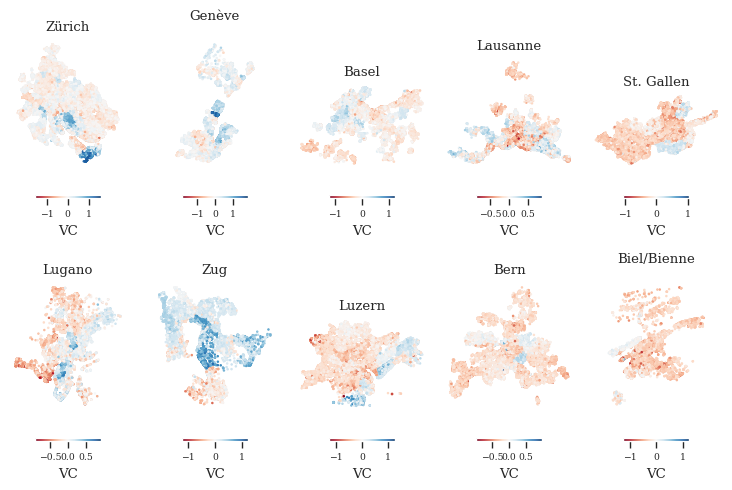

In [27]:
# Model 
f, ax = plt.subplots(2,5, figsize=(7.5,5))
ax = ax.flatten()
for ix, agglo in enumerate(sel_10agglo_lst):
    # gmd = "Lausanne"#sel_10agglo_lst[8]
    tgt = 'error'
    x = dataset.query("Agglo_Name == @agglo")
    # g = ch_g2g18.query("GMDNAME == @gmd")
    # normalize color
    g = dataset.query("Agglo_Name == @sel_10agglo_lst")
    vmin, vmax, vcenter = g[tgt].min(), g[tgt].max(), 0
    # norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    norm = colors.CenteredNorm(vcenter=0)

    # g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
    x.plot(column=tgt, cmap = 'RdBu', s = 1, legend=True, ax = ax[ix], norm = norm,
                        legend_kwds={'label': "VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5})

    ax[ix].set_title(agglo)
    ax[ix].set_axis_off()
plt.tight_layout()
plt.suptitle('Model Error', fontsize = 'large', x = 0, y = 1.05, fontweight = 'bold', x = 0)

SyntaxError: keyword argument repeated: x (3561121551.py, line 21)

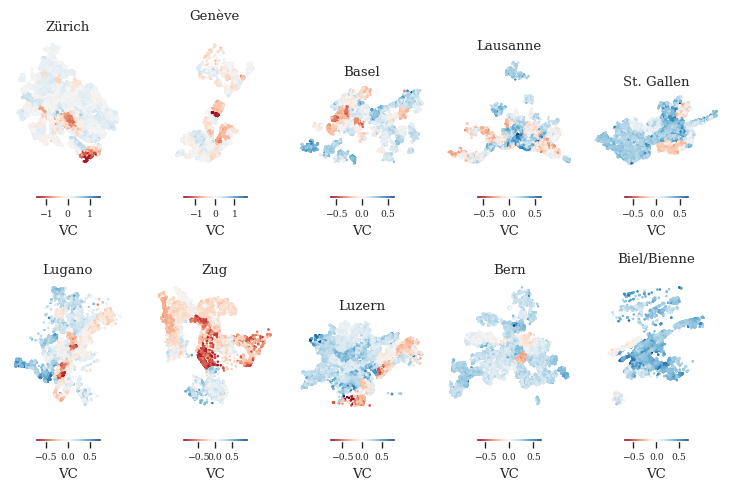

In [29]:
# Model 
f, ax = plt.subplots(2,5, figsize=(7.5,5))
ax = ax.flatten()
g = dataset.query("Agglo_Name == @sel_10agglo_lst")
vmin, vmax, vcenter = g[tgt].min(), g[tgt].max(), g[tgt].median()

for ix, agglo in enumerate(sel_10agglo_lst):
    # gmd = "Lausanne"#sel_10agglo_lst[8]
    tgt = 'nz'
    x = dataset.query("Agglo_Name == @agglo").sample(10000)
    # g = ch_g2g18.query("GMDNAME == @gmd")
    # normalize color

    # norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    norm = colors.CenteredNorm(vcenter=0)
    norm = colors.LogNorm(vmin=vmin, vmax=vmax)

    # g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
    x.plot(column=tgt, cmap = 'RdBu', s = 1, legend=True, ax = ax[ix], vmin = -6, vmax= 6, 
                        legend_kwds={'label': "Standardized VC", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5}
                        )

    ax[ix].set_title(agglo)
    ax[ix].set_axis_off()
plt.tight_layout()
plt.suptitle('Spatial Distribution of VC', fontsize = 'large', x = 0, y = 1.05, fontweight = 'bold')

plt.savefig('../../figs/fig9_spatial_dist_agglo.jpg', dpi=300, bbox_inches='tight')

Text(0, 1.05, 'Absolute Model Error')

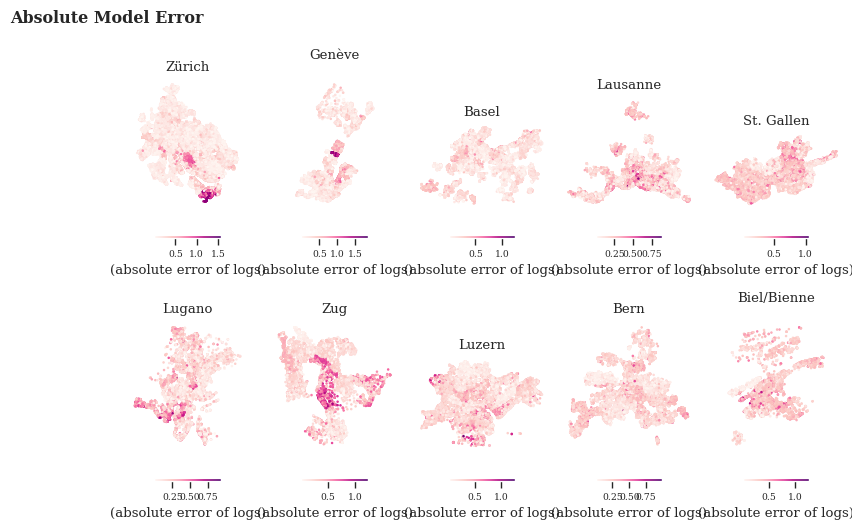

In [110]:
# Model 
dataset['abs_error'] = np.abs(dataset['error'])
f, ax = plt.subplots(2,5, figsize=(7.5,5))
ax = ax.flatten()
for ix, agglo in enumerate(sel_10agglo_lst):
    # gmd = "Lausanne"#sel_10agglo_lst[8]
    tgt = 'abs_error'
    x = dataset.query("Agglo_Name == @agglo")
    # g = ch_g2g18.query("GMDNAME == @gmd")
    # normalize color
    g = dataset.query("Agglo_Name == @sel_10agglo_lst")
    vmin, vmax, vcenter = g[tgt].min(), g[tgt].max(), 0
    # norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    norm = colors.CenteredNorm(vcenter=0)

    # g.plot(color='lightgrey', edgecolor='black', figsize=(5, 5), ax = ax)
    x.plot(column=tgt, cmap = 'RdPu', s = 1, legend=True, ax = ax[ix], #norm = norm,
                        legend_kwds={'label': "(absolute error of logs)", 'location':'bottom','orientation': "horizontal", 'shrink': 0.5})

    ax[ix].set_title(agglo)
    ax[ix].set_axis_off()
plt.tight_layout()
plt.suptitle('Absolute Model Error', fontsize = 'large', x = 0, y = 1.05, fontweight = 'bold')

In [23]:
z_lst = ["Zürich" ,"Zollikon", "Küsnacht (ZH)"  ,"Zumikon", "Erlenbach (ZH)" , 
         "Adliswil", "Kilchberg (ZH)","Rüschlikon","Langnau am Albis","Thalwil",'Oberrieden']      

In [9]:
#IMPORT ADMINISTRATION BOUNDARIES
# ch_g2g18  = gpd.read_file('../../../geodata/ch_districts/ch_districts_g2g18.gpkg')
# ch_lakes = gpd.read_file('../../../geodata/ch_lakes/ch_lakes.gpkg')

#IMPORT ADMINISTRATION BOUNDARIES
ch_g2g18  = gpd.read_file('../../geodata/ch_districts/ch_districts_g2g18.gpkg')
ch_lakes = gpd.read_file('../../geodata/ch_lakes/ch_lakes.gpkg')

# zlake = gpd.clip(ch_lakes.query('ID0 == "9050"').dissolve(), ch_g2g18.query('GMDNAME in @z_lst').dissolve().total_bounds)


In [18]:
# ch_agglo = gpd.read_file('../../../geodata/ch_agglo/swiss_urban_agglomerations.gpkg')
ch_agglo = gpd.read_file('../../geodata/ch_agglo/swiss_urban_agglomerations.gpkg')

agglo_poly = ch_agglo.query("Agglo_Name in @dat.Agglo_Name.unique()").dissolve('Agglo_Name')
agglo_poly = gpd.clip(agglo_poly, ch_g2g18.dissolve())


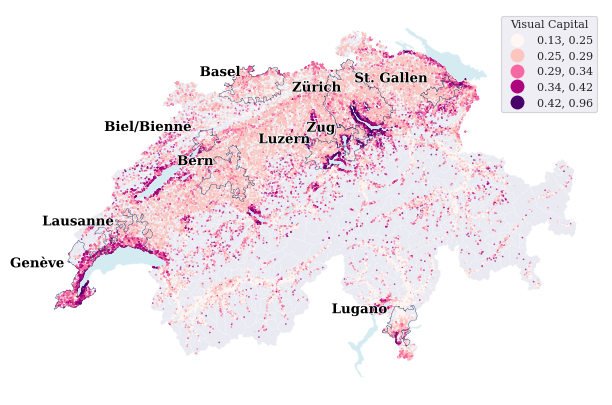

In [27]:
f, ax = plt.subplots(figsize =(10,5))
g = dataset.sample(100000)
ch = ch_g2g18.dissolve()
ch_g2g18.plot(facecolor = '#EAEAF2', edgecolor = 'white', linewidth = 0.1, ax = ax)

tgt = 'mm_nabr_pred'

vmin, vmax, vcenter = g[tgt].min(), g[tgt].max(), 0
    # norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

norm = colors.CenteredNorm(vcenter=0)
ch_lakes.plot(color ='lightblue' , ax = ax, alpha = 0.5)
g.plot(tgt,  markersize = .1, ax=ax,  
            legend = True, scheme = 'naturalbreaks',
            cmap="RdPu",
            # legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5),"label": "Visual Capital"},
                                    )
agglo_poly.plot(ax = ax, facecolor = 'none', edgecolor = color_palette[1], lw = .25)
agglo_poly.reset_index().apply(lambda x: ax.annotate(text=x['Agglo_Name'],
                    color = 'k',weight="bold", #color_palette[1],
                    xy=(x.geometry.centroid.coords[0][0]-9500,x.geometry.centroid.coords[0][1]+6500), 
                    ha='right',path_effects=[pe.withStroke(linewidth=1, foreground='white')]
                    ),axis=1)
leg1 = ax.get_legend()
leg1.set_title("Visual Capital")

plt.axis('off')

plt.savefig('../../figs/fig5_ch_vc.jpg', dpi = 300, bbox_inches = 'tight')

In [75]:
# plt.savefig('../../../LUP_VisualCapital/figs/fig4_ch_predicions.pdf',bbox_inches = 'tight',rasterized=True)


In [107]:
ch = ch_g2g18.dissolve()
agglo_poly = ch_agglo.query("Agglo_Name in @dat.Agglo_Name.unique()").dissolve('Agglo_Name')
agglo_poly = gpd.clip(agglo_poly, ch)
Xsamp = X.sample(1000000)
Xsamp['XGB_scaled'] =  (Xsamp.XGB - Xsamp.XGB.min())/(Xsamp.XGB.max() - Xsamp.XGB.min())
dat['XGB_scaled'] =  (dat.XGB - dat.XGB.min())/(dat.XGB.max() - dat.XGB.min())


In [299]:
#BASEL
xmin, ymin= 2608780,1264256
xmax, ymax= 2619426,1272464

#ZURICH
xmin, ymin= 2682015,1238484
xmax, ymax= 2688492,1244428

xmin, ymin= 2680459,1246557
xmax, ymax= 2686305,1248871

#GENEVA

xmin, ymin== 2499183,1118374
xmax, ymax== 2505864,1123244
#LAUSANNE
comms = ["Saint-Sulpice (VD)","Préverenges","Morges"]
xmin, ymin, xmax, ymax = ch_g2g18.query('GMDNAME in @comms').dissolve().total_bounds

dat_ = X.cx[xmin:xmax, ymin:ymax]
dat_.shape

(6115, 85)

c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


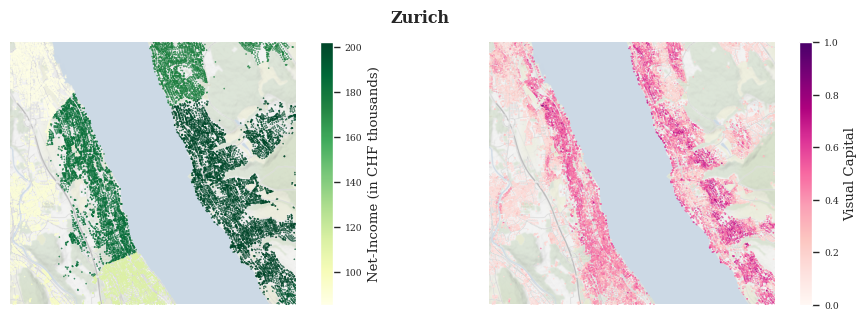

In [21]:
import contextily as cx

#ZURICH
xmin, ymin= 2682015,1238484
xmax, ymax= 2688492,1244428
dat_ = dataset.cx[xmin:xmax, ymin:ymax]


fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(10)

ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(1, 2), loc=(0, 1), colspan=1)

ax2.set_xlim(xmin,xmax),ax2.set_ylim(ymin,ymax)
ax3.set_xlim(xmin,xmax),ax3.set_ylim(ymin,ymax)

ax2.axis('off'),ax3.axis('off')

dat_['XGB_scaled'] =  (dat_.XGB - dat_.XGB.min())/(dat_.XGB.max() - dat_.XGB.min())

dat_.plot('net_income_ptp', markersize = .1, ax=ax2, cmap = 'YlGn', legend = True,
                                    legend_kwds={"label": "Net-Income (in CHF thousands)","location":"right",})



dat_.plot('XGB_scaled', markersize = .1, ax=ax3, cmap = 'RdPu', legend = True,
                                    legend_kwds={"label": "Visual Capital","location":"right",})

# ax2.set_xlim(xmin,xmax),ax2.set_ylim(ymin,ymax)
cx.add_basemap(ax2, crs=dat.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15,attribution = "")
cx.add_basemap(ax3, crs=dat.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15,attribution = "")

plt.tight_layout()
# Display the plot
# plt.show()
plt.suptitle('Zurich', weight = 'bold', ha = 'left', y = 1.05)

plt.savefig('../../figs/fig5_ch_vc_zurich.jpg', dpi = 300, bbox_inches = 'tight')

c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


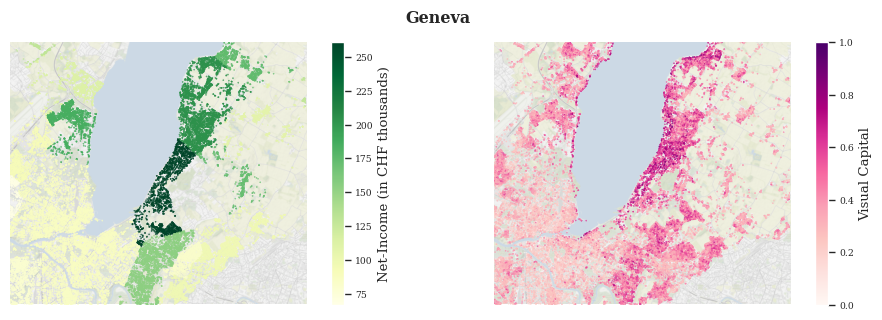

In [22]:
import contextily as cx

#GENEVA
xmin, ymin= 2497657,1115311
xmax, ymax= 2508668,1125050
dat_ = dataset.cx[xmin:xmax, ymin:ymax]


fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(10)

ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(1, 2), loc=(0, 1), colspan=1)

ax2.set_xlim(xmin,xmax),ax2.set_ylim(ymin,ymax)
ax3.set_xlim(xmin,xmax),ax3.set_ylim(ymin,ymax)

ax2.axis('off'),ax3.axis('off')

dat_['XGB_scaled'] =  (dat_.XGB - dat_.XGB.min())/(dat_.XGB.max() - dat_.XGB.min())

dat_.plot('net_income_ptp', markersize = .1, ax=ax2, cmap = 'YlGn', legend = True,
                                    legend_kwds={"label": "Net-Income (in CHF thousands)","location":"right",})



dat_.plot('XGB_scaled', markersize = .1, ax=ax3, cmap = 'RdPu', legend = True,
                                    legend_kwds={"label": "Visual Capital","location":"right",})

# ax2.set_xlim(xmin,xmax),ax2.set_ylim(ymin,ymax)
cx.add_basemap(ax2, crs=dat.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15,attribution = "")
cx.add_basemap(ax3, crs=dat.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15,attribution = "")

plt.tight_layout()
# Display the plot
plt.suptitle('Geneva', weight = 'bold', ha = 'left', y = 1.05)
plt.savefig('../../figs/fig5_ch_vc_geneva.jpg', dpi = 300, bbox_inches = 'tight')

c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


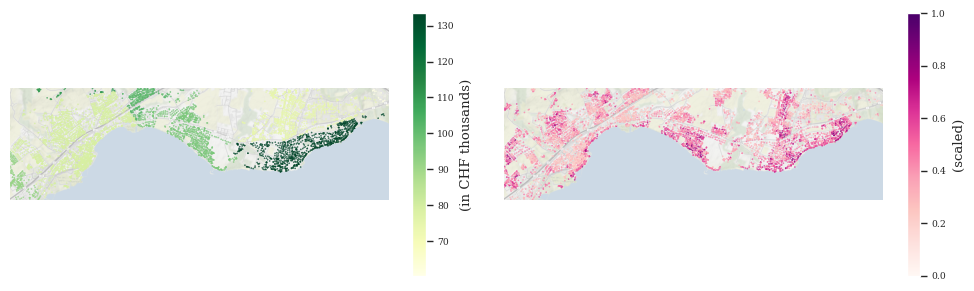

In [23]:
import contextily as cx

#LAUSANNE
comms = ["Saint-Sulpice (VD)","Préverenges","Morges"]
xmin, ymin, xmax, ymax = ch_g2g18.query('GMDNAME in @comms').dissolve().total_bounds
dat_ = dataset.cx[xmin:xmax, ymin:ymax]


fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(10)

ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(1, 2), loc=(0, 1), colspan=1)

ax2.set_xlim(xmin,xmax),ax2.set_ylim(ymin,ymax)
ax3.set_xlim(xmin,xmax),ax3.set_ylim(ymin,ymax)

ax2.axis('off'),ax3.axis('off')

dat_['XGB_scaled'] =  (dat_.XGB - dat_.XGB.min())/(dat_.XGB.max() - dat_.XGB.min())

dat_.plot('net_income_ptp', markersize = .1, ax=ax2, cmap = 'YlGn', legend = True,
                                    legend_kwds={"label": "(in CHF thousands)","location":"right",})



dat_.plot('XGB_scaled', markersize = .1, ax=ax3, cmap = 'RdPu', legend = True,
                                    legend_kwds={"label": "(scaled)","location":"right",})

# ax2.set_xlim(xmin,xmax),ax2.set_ylim(ymin,ymax)
cx.add_basemap(ax2, crs=dat.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15,attribution = "")
cx.add_basemap(ax3, crs=dat.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15,attribution = "")

plt.tight_layout()
# Display the plot
# plt.show()

plt.savefig('../../figs/fig5_ch_vc_stsulpice.jpg', dpi = 300, bbox_inches = 'tight')

/Users/adamswietek/opt/anaconda3/envs/env_intel_sdb/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


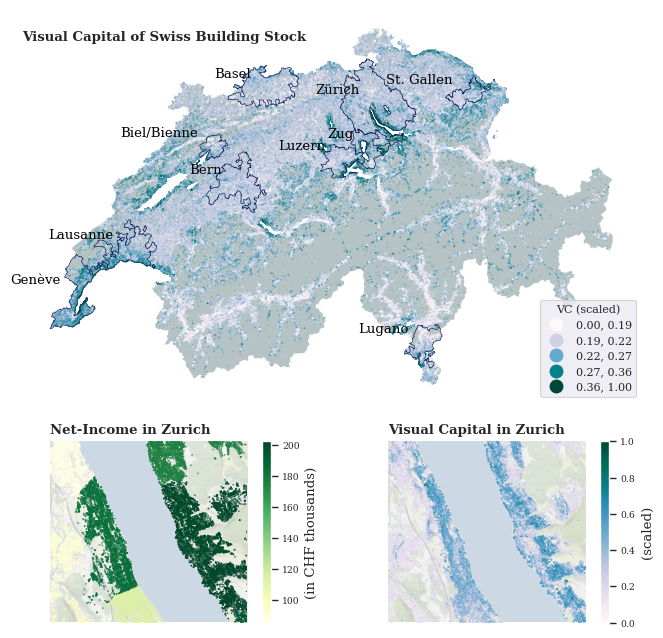

In [302]:
#Switzerland
Xsamp = X.sample(1000000)
Xsamp['XGB_scaled'] =  (Xsamp.XGB - Xsamp.XGB.min())/(Xsamp.XGB.max() - Xsamp.XGB.min())

#ZURICH
xmin, ymin= 2682015,1238484
xmax, ymax= 2688492,1244428
dat_ = X.cx[xmin:xmax, ymin:ymax]
dat_['XGB_scaled'] =  (dat_.XGB - dat_.XGB.min())/(dat_.XGB.max() - dat_.XGB.min())


# creating grid for subplots
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(shape=(3, 2), loc=(2, 0), colspan=1)
ax3 = plt.subplot2grid(shape=(3, 2), loc=(2, 1), colspan=1)

ax1.tick_params(axis='both', which='major', bottom=False, left=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', which='major', bottom=False, left=False, labelbottom=False, labelleft=False)
ax3.tick_params(axis='both', which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

ax1.set_title('Visual Capital of Swiss Building Stock', x = 0, y = .9, ha = 'left', fontweight = 'bold')
ax2.set_title('Net-Income in Zurich', x = 0, y = 1, ha = 'left', fontweight = 'bold')
ax3.set_title('Visual Capital in Zurich', x = 0, y = 1, ha = 'left', fontweight = 'bold')

ax1.axis('off'),ax2.axis('off'),ax3.axis('off')
ax2.set_xlim(xmin,xmax),ax2.set_ylim(ymin,ymax)
ax3.set_xlim(xmin,xmax),ax3.set_ylim(ymin,ymax)

# ch_g2g18.query('GMDNAME in @z_lst').apply(lambda x: ax2.annotate(text=x['GMDNAME'], xy=x.geometry.centroid.coords[0], ha='center',), axis=1)
# ch_g2g18.query('GMDNAME in @z_lst').apply(lambda x: ax3.annotate(text=x['GMDNAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)


cx.add_basemap(ax2, crs=dat.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15, attribution="")
cx.add_basemap(ax3, crs=dat.crs.to_string(), source=cx.providers.Stamen.Terrain, alpha = .5, zoom = 15, attribution="")


ch.plot(color = color_palette[4], ax = ax1)


Xsamp.plot('XGB_scaled',  markersize = .01, ax=ax1, 
            legend = True,scheme = 'naturalbreaks',
            cmap="PuBuGn",
            legend_kwds={"loc": "lower right"}#, "bbox_to_anchor": (1, 0.5)},
                                    # legend_kwds={"label": "(in CHF thousands)",'shrink':.5}
                                    )

agglo_poly.plot(ax = ax1, facecolor = 'none', edgecolor = color_palette[1], lw = .5)
agglo_poly.reset_index().apply(lambda x: ax1.annotate(text=x['Agglo_Name'],
                    color = 'k',#color_palette[1],
                    xy=(x.geometry.centroid.coords[0][0]-9500,x.geometry.centroid.coords[0][1]+6500), 
                    ha='right',#path_effects=[pe.withStroke(linewidth=1, foreground='k')]
                    ),axis=1)
leg1 = ax1.get_legend()
leg1.set_title("VC (scaled)")


# ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'white', linewidth = 1, facecolor = color_palette[4],ax=ax2,zorder= 1)
# ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax2)
# # zlake.plot(color = 'lightblue', ax = ax)
dat_.plot('net_income_ptp', markersize = .1, ax=ax2, cmap = 'YlGn', legend = True,
                                    legend_kwds={"label": "(in CHF thousands)"})


# ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'white', linewidth = 1, facecolor = color_palette[4],ax=ax3,zorder= 1)
# ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax2)
# # zlake.plot(color = 'lightblue', ax = ax)
dat_.plot('XGB_scaled', markersize = .1, ax=ax3, cmap = 'PuBuGn', legend = True,
                                    legend_kwds={"label": "(scaled)"})

plt.savefig('../../../LUP_VisualCapital/figs/fig4_ch_predictions.jpg',bbox_inches = 'tight',dpi=300)


In [100]:
z_lst = ["Zürich" ,"Zollikon", "Küsnacht (ZH)"  ,"Zumikon", "Erlenbach (ZH)" , 
         "Adliswil", "Kilchberg (ZH)","Rüschlikon","Langnau am Albis","Thalwil",'Oberrieden'] 

(2675424.0, 2693068.0, 1237947.95, 1255109.05)

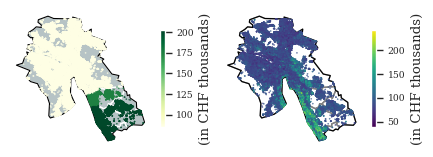

In [63]:
f, ax = plt.subplots(ncols = 2, figsize=(5, 5))

# axis 1_________

ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'white', linewidth = 1, facecolor = color_palette[4],ax=ax[0],zorder= 1)
ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax[0])
# zlake.plot(color = 'lightblue', ax = ax)
dat.query('GMDNAME in @z_lst').plot('net_income_ptp', markersize = .1, ax=ax[0], cmap = 'YlGn', legend = True,
                                    legend_kwds={"label": "(in CHF thousands)", 'shrink':.25})

ax[0].axis('off')
# plt.axis('off')
# plt.title('Commune Avg. Net-Income Per Taxpayer (CLI)',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
# plt.axis('off')
ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'grey', linewidth = 1, facecolor = 'none',ax=ax[1])
ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax[1])
# zlake.plot(color = 'lightblue', ax = ax)
dat.query('GMDNAME in @z_lst').plot('XGB', markersize = .1, ax=ax[1], cmap = 'viridis', legend = True,
                                    legend_kwds={"label": "(in CHF thousands)", 'shrink':.25})

# plt.title('Building-level Prediction (Visual Capital)',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
ax[1].axis('off')

(2675424.0, 2693068.0, 1234017.8, 1255296.2)

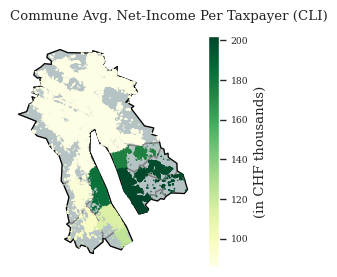

In [ ]:
f, ax = plt.subplots(ncols = 2, figsize=(3, 3))
ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'white', linewidth = 1, facecolor = color_palette[4],ax=ax[0],zorder= 1)
ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax[0])
# zlake.plot(color = 'lightblue', ax = ax)
dat.query('GMDNAME in @z_lst').plot('net_income_ptp', markersize = .1, ax=ax[0], cmap = 'YlGn', legend = True,
                                    legend_kwds={"label": "(in CHF thousands)"})


plt.title('Commune Avg. Net-Income Per Taxpayer (CLI)',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
# plt.axis('off')

(2675424.0, 2693068.0, 1234017.8, 1255296.2)

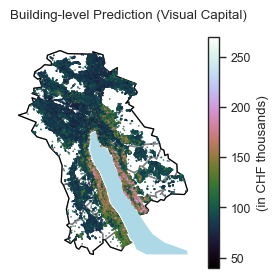

In [328]:
f, ax = plt.subplots(figsize=(3, 3))
ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'grey', linewidth = 1, facecolor = 'none',ax=ax)
ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
zlake.plot(color = 'lightblue', ax = ax)
df.query('GMDNAME in @z_lst').plot('XGB', markersize = .1, ax=ax, cmap = 'cubehelix', legend = True,
                                    legend_kwds={"label": "(in CHF thousands)"})

plt.title('Building-level Prediction (Visual Capital)',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
plt.axis('off')

In [314]:
dat['abs_error'] = np.abs(dat['error'])

(2675424.0, 2693068.0, 1234017.8, 1255296.2)

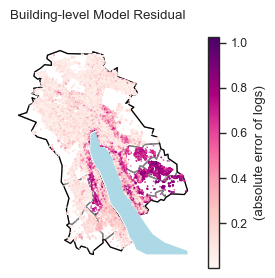

In [335]:
f, ax = plt.subplots(figsize=(3, 3))
ch_g2g18.query('GMDNAME in @z_lst').plot(edgecolor = 'grey', linewidth = 1, facecolor = 'none',ax=ax)
ch_g2g18.query('GMDNAME in @z_lst').dissolve().plot(facecolor = 'none', edgecolor = 'black', ax = ax)
zlake.plot(color = 'lightblue', ax = ax)
dat.query('GMDNAME in @z_lst').plot('abs_error', markersize = .1, ax=ax, cmap = 'RdPu', legend = True,
                                    legend_kwds={"label": "(absolute error of logs)"})

plt.title('Building-level Model Residual',loc = 'left', wrap = True)#,fontweight = 'bold', pad = 0)
plt.axis('off')